<a href="https://colab.research.google.com/github/digdemorhan/Keras_With_Examples_For_Deep_Learning/blob/main/KerasSequentialAPIExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Tensorflow'un import edilmesi
import tensorflow as tf

#Datasetin yüklenmesi
from sklearn.datasets import fetch_california_housing

#Datasetin bir değişkene atanması
housing = fetch_california_housing()

#Eğitim ve test verilerinin parçalanması
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)

#Validation parametrelerinin oluşturulması
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

# Verilerin ölçeklenmesi
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

#Modelin kurulması
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(1, activation="linear")
    ]
)

#Modelin compile edilmesi
model.compile(
    loss = "mean_squared_error",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ["mae"]
)

#Modelin eğitimi
history = model.fit(
    X_train, y_train, epochs=50, batch_size=32, validation_data=(X_valid, y_valid)
)

# Test verisi üzerinde modelin değerlendirilmesi
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.7129 - mae: 0.9405 - val_loss: 0.4349 - val_mae: 0.4645
Epoch 2/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5218 - mae: 0.5137 - val_loss: 0.7010 - val_mae: 0.4500
Epoch 3/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4604 - mae: 0.4751 - val_loss: 0.3967 - val_mae: 0.4271
Epoch 4/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4150 - mae: 0.4562 - val_loss: 0.9433 - val_mae: 0.4355
Epoch 5/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4025 - mae: 0.4507 - val_loss: 0.5537 - val_mae: 0.4163
Epoch 6/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3775 - mae: 0.4382 - val_loss: 0.8849 - val_mae: 0.4218
Epoch 7/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3720 - mae: 0.4326 - val_loss: 0.3125 - val_mae: 0.3953
Epoch 8/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3699 - mae: 0.4284 - val_loss: 0.3430 - val_mae: 0.3928
Epoch 9/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3504 

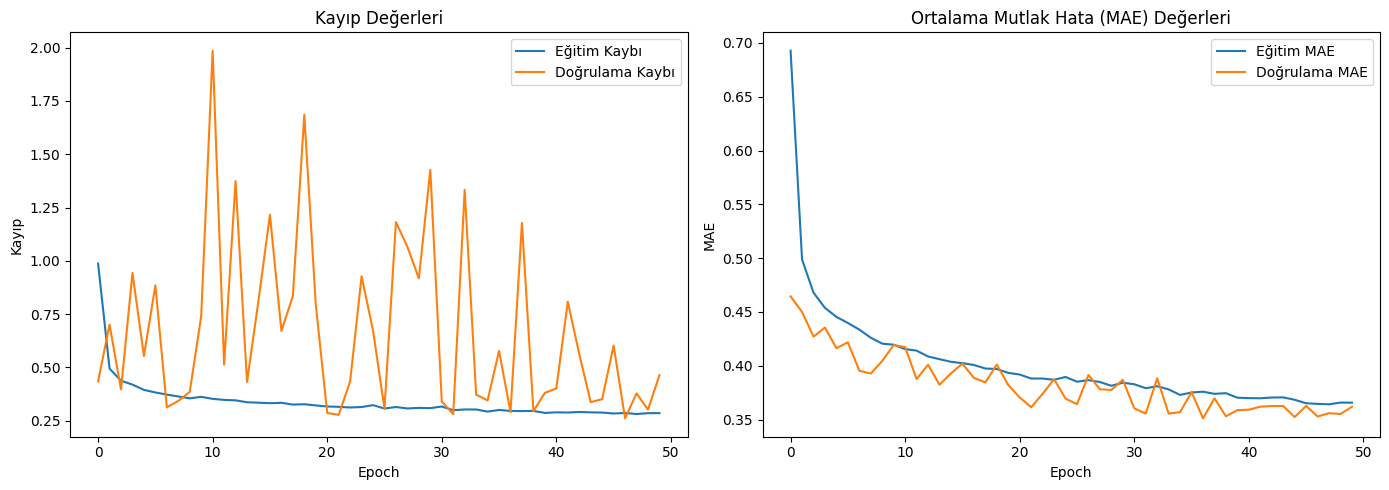

In [ ]:
import matplotlib.pyplot as plt

# Kayıp değerlerinin ve doğruluğun görselleştirilmesi
plt.figure(figsize=(14, 5))

# Kayıp grafiği
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Kayıp Değerleri')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

# MAE grafiği
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Eğitim MAE')
plt.plot(history.history['val_mae'], label='Doğrulama MAE')
plt.title('Ortalama Mutlak Hata (MAE) Değerleri')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()